<a href="https://colab.research.google.com/github/BMClab/BMC/blob/master/notebooks/SignalBasicProperties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic properties of signals

> Marcos Duarte, Renato Naville Watanabe  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br)  
> Federal University of ABC, Brazil

A signal is a set of data that conveys information about some phenomenon (Bendat, Piersol 2010; Lathi 2009; Lyons 2010). A signal can be represented mathematically by a function of one or more independent variables. We also refer to signal as simply data. The time-dependent voltage of an electric circuit and the acceleration of a moving body are examples of signals.  

Let's see now a brief description about the basic properties of signals (for a more detailed description, see Bendat, Piersol 2010; Lathi 2009; Lyons 2010; Smith 1997).

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Amplitude, frequency, period, and phase

A periodic function can be characterized by the properties: amplitude, frequency, period, and phase. Let's exemplify these properties for a periodic function composed by a single frequency, the sine wave or sinusoid [trigonometric function](https://en.wikipedia.org/wiki/Trigonometric_functions):

$$ x(t) = A\sin(2 \pi f t + \phi) $$

Where $A$ is the amplitude, $f$ the frequency, $\phi$ the phase, and $T=1/f$ the period of the function $x(t)$.  

We can define $\omega=2\pi f = 2\pi/T$ as the angular frequency, then:

$$ x(t) = A\sin(\omega t + \phi) $$

Let's visualize this function:

In [2]:
t = np.linspace(-2, 2, 101)                    # time vector
A = 2                                          # amplitude
freq = 0.5                                     # frequency, Hz
phase = np.pi/4                                # phase, radians (45o)
x1 = 1 * np.sin(2 * np.pi * 1 * t + 0)         # sinusoid 1
x2 = A * np.sin(2 * np.pi * freq * t + phase)  # sinusoid 2

In [3]:
def wave_plot(freq, t, y, y2, ax=None):
    """Propertie of waves: amplitude, frequency, phase.
    """
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator

    plt.rc('xtick', labelsize=14)
    plt.rc('ytick', labelsize=14)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.plot(t, y, color=[0, .5, 0, .5], linewidth=5)
    ax.plot(t, y2, color=[0, 0, 1, .5], linewidth=5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='both', direction='inout', which='both', length=5)
    ax.set_xlim((-2.05, 2.05))
    ax.set_ylim((-2.1, 2.1))
    ax.locator_params(axis='both', nbins=7)
    ax.xaxis.set_minor_locator(MultipleLocator(.25))
    ax.yaxis.set_minor_locator(MultipleLocator(.5))
    ax.grid(which='both')
    ax.set_title(r'$Asin(2\pi ft+\phi)$', loc='left', size=20, color=[0, 0, 0])
    ax.set_title(r'$x_1=sin(2\pi t)$', loc='center', size=20, color=[0, .5, 0])
    ax.set_title(r'$x_2=2sin(\pi t + \pi/4)$', loc='right', size=20, color=[0, 0, 1])
    ax.annotate('', xy=(.25, 0), xycoords='data', xytext=(.25, 2), size=16,
                textcoords='data',
                arrowprops={'arrowstyle': '<->', 'fc': 'b', 'ec': 'b'})
    ax.annotate(r'$A=2$', xy=(.25, 1.1), xycoords = 'data', xytext=(0, 0),
                textcoords = 'offset points', size=18, color='b')
    ax.annotate('', xy=(0, 1.6), xycoords='data', xytext=(-.25, 1.6), size=16,
                textcoords='data',
                arrowprops={'arrowstyle': '<->', 'fc': 'b', 'ec': 'b'})
    ax.annotate(r'$t_{\phi}=\phi/2\pi f\,(\phi=\pi/4)$', xy=(-1.25, 1.6),
                xycoords = 'data', xytext=(0, -5),
                textcoords = 'offset points', size=18, color='b')
    ax.annotate('', xy=(-.25, 0), xycoords='data', xytext=(-.25, 2),
                textcoords='data', arrowprops={'arrowstyle': '-',
                'linestyle': 'dotted', 'fc': 'b', 'ec': 'b'}, size=16)
    ax.annotate('', xy=(-.75, -1.8), xycoords='data', xytext=(1.25, -1.8),
                textcoords='data', size=10,
                arrowprops={'arrowstyle': '|-|', 'fc': 'b', 'ec': 'b'})
    ax.annotate(r'$T=1/f\,(f=0.5\,Hz)$', xy=(-.16, -1.8), xycoords = 'data',
                 xytext=(0, 8), textcoords = 'offset points', size=18, color='b')
    ax.annotate(r'$t[s]$', xy=(2.05, -.5), xycoords = 'data', xytext=(0, 0),
                textcoords = 'offset points', size=18, color='k')
    plt.suptitle(r'Amplitude ($A$), frequency ($f$), period ($T$), phase ($\phi$)',
                 fontsize=18, y=1.08)

    return ax

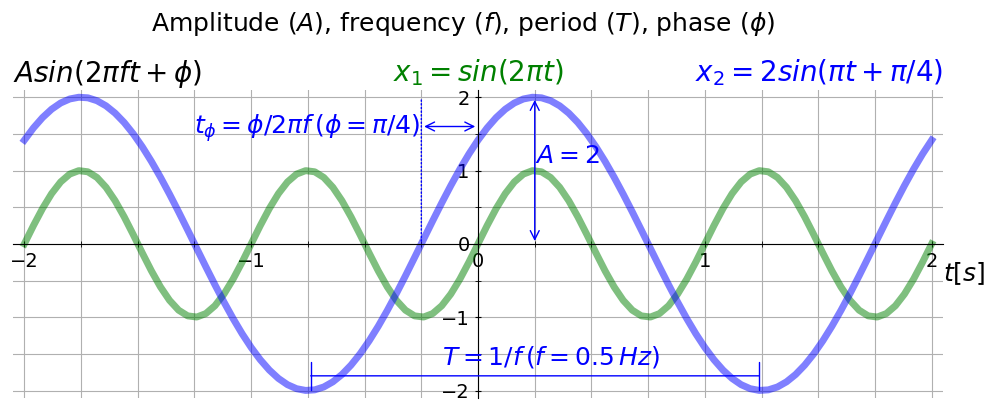

In [4]:
ax = wave_plot(freq, t, x1, x2, ax=None)
%config InlineBackend.close_figures=False  # hold plot for next cell

Can you guess the shape of the sum of the two curves we just plotted?

$$ x_3 = x_1 + x_2 $$

$$ x_3 = \sin(2 \pi t) + 2\sin(4 \pi t + \pi/4) $$

And here is the plot:

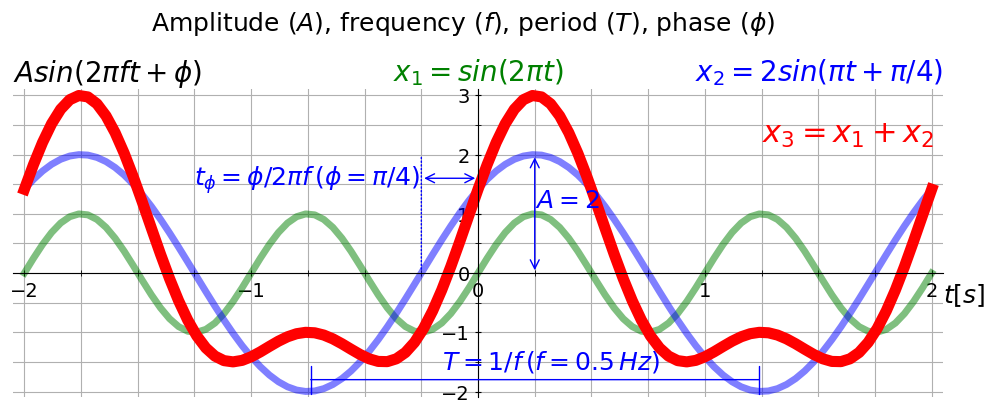

In [5]:
x3 = x1 + x2

ax.plot(t, x3, 'r', linewidth=8)
ax.annotate(r'$x_3 = x_1 + x_2$', xy=(1.25, 2.2), xycoords = 'data', size=22, color='r')
ax.set_ylim((-2.1, 3.1))
%config InlineBackend.close_figures=True  # hold off the figure
plt.show()

### Magnitude and power

Other terms related to amplitude are magnitude and power. The magnitude is the absolute value (without the signal) of the amplitude. The power of a signal is proportional to its amplitude (or magnitude) squared.

## Periodic function, fundamental frequency, and harmonics

A function is said to be periodic with period $T$ if $ x(t+T) = x(t)$ for all values of $t$, that is, the function repeats itself after a period. Important properties of this definition are that the sum of periodic functions and a constant times a periodic function are also periodic functions. In particular, this means that a periodic function also repeats itself after $2T,\: 3T, \dots$.  
The shortest period that the function repeats itself (in this case, $T$) is said to be the fundamental period and its inverse, the fundamental frequency of the periodic function. A [harmonic](http://en.wikipedia.org/wiki/Harmonic) is a component frequency of the function that is an integer multiple of the fundamental frequency, i.e., the harmonics have frequencies $f,\: 2f,\: 3f, \dots$ (which have periods $T,\: T/2,\: T/3, \dots$) and are referred as the first, second, and third harmonics, respectively.

## AC and DC components

A periodic function can also be characterized by its [AC and DC components](https://en.wikipedia.org/wiki/DC_bias). These terms originated in electronics and mean alternate current and direct current, respectively. The DC component, also referred as DC offset or DC bias, is simply the average (mean) value of the function, i.e., the constant part of the function. The AC component is the oscillatory part of the function and can be found by subtracting the function average value (the DC component) from the function itself.  
The next figure illustrates these components.

In [6]:
def ac_dc_plot(ax=None):
    """Plot AC and DC components of signals.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax = ax.flat
    t = t = np.linspace(0, 1, 101)
    AC = np.sin(2*4*np.pi*t)
    DC = 2*np.ones(t.shape)
    ax[0].plot(t, AC, 'b', linewidth=3, label=r'AC')
    ax[0].set_title(r'$AC:\;sin(8\pi t)$', fontsize=18)
    ax[1].plot(t, DC, 'g', linewidth=3, label=r'DC')
    ax[1].set_title(r'$DC:\; 2$', fontsize=18)
    ax[2].plot(t, AC+DC, 'r', linewidth=3, label='AC+DC')
    ax[2].plot(t, AC, 'b:', linewidth=2, label='AC')
    ax[2].plot(t, DC, 'g:', linewidth=2, label='DC')
    ax[2].set_title(r'$AC+DC:\;sin(8\pi t)+2$', fontsize=18)
    for axi in ax:
        axi.set_ylim(-1.2, 3.2)
        axi.margins(.02)
        axi.spines['bottom'].set_position('zero')
        axi.spines['top'].set_color('none')
        axi.spines['left'].set_position('zero')
        axi.spines['right'].set_color('none')
        axi.xaxis.set_ticks_position('bottom')
        axi.yaxis.set_ticks_position('left')
        axi.tick_params(axis='both', direction='inout', which='both', length=5)
        axi.locator_params(axis='both', nbins=4)
    fig.tight_layout()

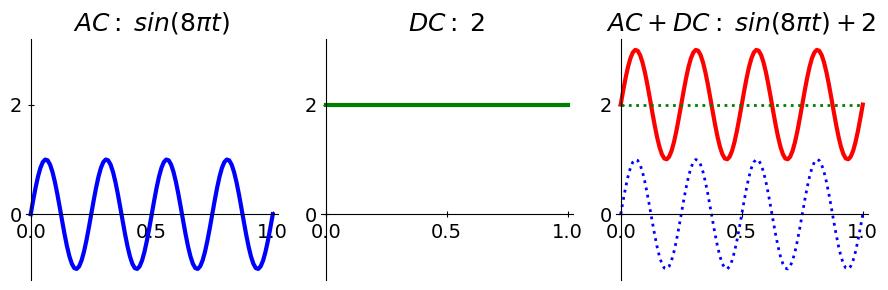

In [7]:
ax = ac_dc_plot()

Note that for a periodic function like $x(t)=A\cos(2\pi f t)$, when its frequency is zero, $x(t)=A$. That is, the function $x(t)$ has only a DC component (if $A$ is different from zero). Because that, we can say that the DC component of a function has a frequency equals to zero (an infinite period).

## Even and odd functions

[Even and odd functions](https://en.wikipedia.org/wiki/Even_and_odd_functions) are functions which satisfy symmetry relations with respect to taking additive inverses. The [additive inverse](https://en.wikipedia.org/wiki/Additive_inverse) of a number x is the number that added to x yields zero.

The function $x(t)$ is even if $x(t) = x(-t)$ and $x(t)$ is odd if $x(t) = -x(-t)$.

The cosine function is even, for instance, $\cos(\pi)=\cos(-\pi)$, and the sine function is odd, for instance, $\sin(\pi/2)=-\sin(-\pi/2)$; confer the next figure.

In [8]:
def even_odd_plot(ax=None):
    """Plot even and odd signals.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(9, 3))
    ax = ax.flat
    t = t = np.linspace(-np.pi, np.pi, 101)
    sin = np.sin(t)
    cos = np.cos(t)
    ax[0].plot(t, cos, 'b', linewidth=3, label=r'$cos(t)$')
    ax[0].plot([np.pi, np.pi], [0, -1], 'r:', linewidth=3)
    ax[0].plot([-np.pi, -np.pi], [0, -1], 'r:', linewidth=3)
    ax[0].plot([-np.pi, np.pi], [-1, -1], 'r:', linewidth=3)
    ax[0].set_title(r'$Even\;function:\;cos(t) = cos(-t)$', fontsize=16)
    ax[1].plot(t, sin, 'g', linewidth=3, label=r'$sin(t)$')
    ax[1].plot([-np.pi/2, -np.pi/2], [0, -1], 'r:', linewidth=3)
    ax[1].plot([-np.pi/2, 0], [-1, -1], 'r:', linewidth=3)
    ax[1].plot([np.pi/2, np.pi/2], [0, 1], 'r:', linewidth=3)
    ax[1].plot([0, np.pi/2], [1, 1], 'r:', linewidth=3)
    ax[1].set_title(r'$Odd\;function:\;sin(t) =-sin(-t)$', fontsize=16)
    for axi in ax:
        axi.margins(.02)
        axi.spines['bottom'].set_position('zero')
        axi.spines['top'].set_color('none')
        axi.spines['left'].set_position('zero')
        axi.spines['right'].set_color('none')
        axi.xaxis.set_ticks_position('bottom')
        axi.yaxis.set_ticks_position('left')
        axi.tick_params(axis='both', direction='inout', which='both', length=5)
        axi.locator_params(axis='both', nbins=5)
        axi.set_xlim((-np.pi-0.2, np.pi+0.2))
        axi.set_ylim((-1.1, 1.1))
        axi.set_xticks(np.linspace(-np.pi, np.pi, 5))
        axi.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'],
                            fontsize=16)
        for label in axi.get_xticklabels() + axi.get_yticklabels():
            label.set_bbox(dict(facecolor='white', edgecolor='None',
                                alpha=0.65))
    fig.tight_layout()

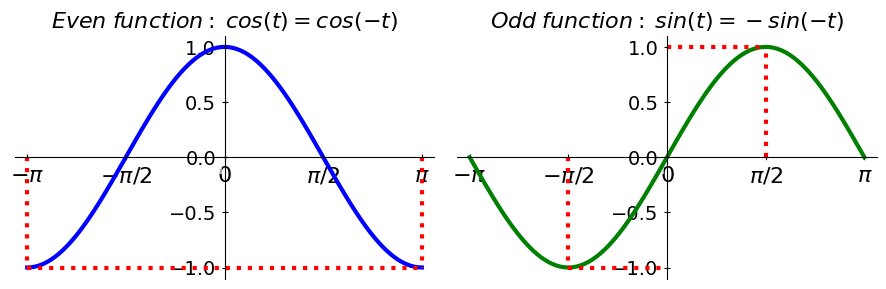

In [9]:
ax = even_odd_plot()

## Continuous and discrete signals

A [continuous signal](https://en.wikipedia.org/wiki/Continuous_signal) is dependent of a continuous variable, that is, the independent variable varies continuously (it has a continuum domain). On the other hand, a [discrete signal](https://en.wikipedia.org/wiki/Discrete-time_signal) is dependent of a discrete variable, that is, the independent variable is defined only on a discrete set of values. For instance, the temperature throughout the day (T(t)) is a continuous signal in the sense it depends on time, which varies continuously. However, if we measure the temperature only at certain times, let's say every hour, then this new signal is discrete because  its independent variable is discrete (t= 8 am, 9 am, 10 am, ...).  
The following figure illustrates continuous and discrete signals (however, since we are using a digital computer, the continuous signal below is in fact not authentic!):

In [10]:
def cont_disc_plot(ax=None):
    """Plot of continuous and discrete signals.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(9, 3))
    ax = ax.flat
    t = np.linspace(0, 1, 101)
    x = np.sin(2*np.pi*t)
    ax[0].plot(t, x, 'r', linewidth=3)
    ax[0].set_title('Continuous signal', fontsize=16)
    ax[1].stem(t[::5], x[::5], markerfmt='ro', linefmt='b--',
               label=r'$sin(t)$')
    ax[1].set_title('Discrete signal', fontsize=16)
    for axi in ax:
        axi.margins(.02)
        axi.set_ylabel('Amplitude')
        axi.spines['bottom'].set_position('zero')
        axi.spines['top'].set_color('none')
        axi.spines['left'].set_position('zero')
        axi.spines['right'].set_color('none')
        axi.xaxis.set_ticks_position('bottom')
        axi.yaxis.set_ticks_position('left')
        axi.tick_params(axis='both', direction='inout', which='both',
                        length=5)
        axi.locator_params(axis='both', nbins=5)
        axi.set_ylim((-1.1, 1.1))
        axi.set_ylabel(r'Amplitude', fontsize=16)
        axi.annotate(r't[s]', xy=(.95, .1), xycoords = 'data', color='k',
                     size=14, xytext=(0, 0), textcoords = 'offset points')
    fig.tight_layout()

    return ax

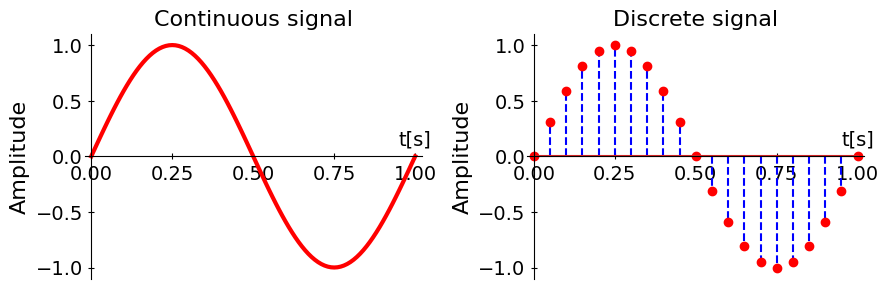

In [11]:
ax = cont_disc_plot()

### Sampling

The reduction of a continuous signal to a discrete signal is called <a href="https://en.wikipedia.org/wiki/Sampling_(signal_processing)">sampling</a> and the frequency which this is performed is called sampling frequency or sampling rate. The unit of the sampling frequency is hertz (Hz). For instance, the discrete signal plotted above has a sampling frequency of 20 Hz (the data were sampled at a 0.05 s interval).

Sampling is the basis for using digital computers to record and store data from a observed phenomenon. As computers have a finite memory, one can not store a continuous signal (how many instants are in a period of one second?). This leads us to the related property: analog and digital signals.

### Nyquist-Shannon sampling theorem

Some requirements must be satisfied for the proper discretization of a signal and an important one is expressed in the [Nyquist-Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem), which is given by (Shannon's version):  
> "If a function x(t) contains no frequencies higher than B hertz, it is completely determined by giving its ordinates at a series of points spaced 1/(2B) seconds apart."

That is, to appropriately acquire data from some phenomenon which its highest frequency component is $f_B$, the sampling frequency ($fs$) must be at least two times that, $fs\geq2f_B$. The Nyquist frequency (the highest possible frequency in the acquired (sampled) signal) is half of the sampling frequency.

When the Nyquist-Shannon sampling theorem is not satisfied and a continuous signal is discretized with a frequency less than two times of its highest frequency, it occurs an effect called [aliasing](https://en.wikipedia.org/wiki/Aliasing). In this case, the discrete signal does not contain the same information as the continuous signal.

## Analog and digital signals

The amplitude of an [analog signal](https://en.wikipedia.org/wiki/Analog_signal) can take on any value (an infinite number of possible values) in a continuous range. On the other hand, the amplitude of a [digital signal](https://en.wikipedia.org/wiki/Digital_signal) can take only certain values (a finite number of possible values). For instance, a binary signal can take only two values.

The continuous and discrete properties refer to the independent variable (for instance, time) and the analog and digital properties refer to the amplitude of the dependent variable (the signal itself).

### Quantization

The reduction of an analog signal to a digital signal is called <a href="https://en.wikipedia.org/wiki/Quantization_(signal_processing)">quantization</a> and in the context of measurement this is typically performed by an [analog-to-digital (A/D) converter](https://en.wikipedia.org/wiki/Analog-to-digital_converter). The number of discrete values of the signal amplitude over the range of the measured signal is the resolution of the quantization. Because digital computers are often employed in this process, resolution is expressed in number of bits and is a power of two. For instance, a resolution of 1 bit can encode an analog input to one in 2 ($2^0$) different levels, a resolution of 4 bits can encode an analog input to one in 16 ($2^4$) different levels, and a good commercial A/D converter has a resolution of 16 bits ($2^16$=65536 levels).

If we know the voltage range (maximum minus minimum signal that can be read) of a A/D converter, we can express the resolution in Volts. For instance, a typical range is 10 V [-5V, 5V]; for 1 bit the resolution is 5 V, for 4 bits is 0.625, and for 16 bits is around 0.00015 V (0.15 mV), as illustrated in the next figure.

In [14]:
def quantize_plot(ax=None):
    """Plot of continuous and discrete signals.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(9, 4))
    ax = ax.flat
    t = np.linspace(0, 1, 101)
    x = np.sin(2*np.pi*t)
    x1 = quantize(x, 1, 2)
    ax[0].plot(t, x, linewidth=2, color=[0, 0, 1, .3])
    ax[0].plot(t, x1, 'r.', linewidth=1, drawstyle='steps')
    ax[0].set_title('2-bit resolution', fontsize=12)
    x4 = quantize(x, 4, 2)
    ax[1].plot(t, x, linewidth=2, color=[0, 0, 1, .3])
    ax[1].plot(t, x4, 'r.', linewidth=1, drawstyle='steps')
    ax[1].set_title('4-bit resolution', fontsize=12)
    x16 = quantize(x, 16, 2)
    ax[2].plot(t, x, linewidth=2, color=[0, 0, 1, .3])
    ax[2].plot(t, x16, 'r.', linewidth=1, drawstyle='steps')
    ax[2].set_title('16-bit resolution', fontsize=12)
    for axi in ax:
        axi.margins(.02)
        axi.spines['bottom'].set_position('zero')
        axi.spines['top'].set_color('none')
        axi.spines['left'].set_position('zero')
        axi.spines['right'].set_color('none')
        axi.xaxis.set_ticks_position('bottom')
        axi.yaxis.set_ticks_position('left')
        axi.tick_params(axis='both', direction='inout', which='both', length=5)
        axi.locator_params(axis='both', nbins=5)
        axi.set_ylim((-1.1, 1.1))
    fig.tight_layout()

    return ax


def quantize(x, n_bits, v_range):
    """ Quantizes `x` given `nbits` resolution and `v_range` range."""
    r = v_range/2**n_bits
    return r*np.sign(x)*np.ceil(np.abs(x)/r)
    # a true a/d converter should use 'floor' instead of 'ceil':
    # return r*np.ceil(x/r)

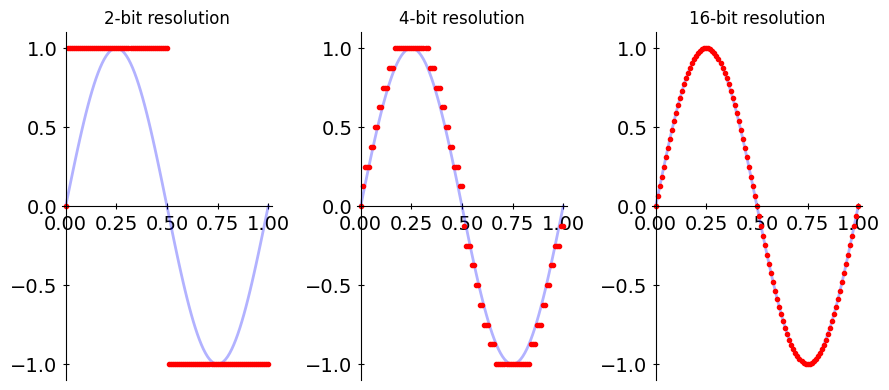

In [15]:
ax = quantize_plot()

## Deterministic and random signals

A deterministic signal can be described by an explicit mathematical function. On other hand, a random signal cannot be described by an explicit mathematical function. A sine wave and a parabola are examples of deterministic signals. The outcomes of throwing a coin and a dice are random. Although the set of possible values are limited and known, there is no mathematical function to predict the exact outcome; just its probability of happening. Most measurements of observed phenomena in nature contain both deterministic and random signals.

Since by definition there is no explicit mathematical function to generate a random signal, computers in fact are unable to generate true random data. For that, one needs to extract data from nature and inject into the computer! Read more about that in [Introduction to Randomness and Random Numbers](https://www.random.org/randomness/).

## Signal and noise

With respect to what is being measured, data can be classified as signal or noise.  
<a href="https://en.wikipedia.org/wiki/Signal_(electrical_engineering)">Signal</a> is what you want of the phenomenon and you believe this signal truly represents the phenomenon being measured (or modeled) and [noise](https://en.wikipedia.org/wiki/Noise) is what you don't want in a measurement because, in principle, it has no significant role to the understanding of the observed phenomenon.  
As much as this argument is tautological, the distinction between noise and signal depends on what you think is relevant about the observed phenomenon. Experimental data are contaminated by noise and it is rarely possible to completely distinguish signal from noise.  
[Signal-to-Noise ratio](https://en.wikipedia.org/wiki/Signal-to-noise_ratio) (SNR or S/N) is a measure to quantify the level of a desired signal in relation to the level of background noise. It is defined as the ratio between the power of the signal content and the power of the noise content in some data.

## Signal and system

In engineering, signal is often associated to a system, which is an entity (a physical or virtual device) that takes a signal as input and produces another signal as output. In mathematics, if a signal can be represented as a function, the analogous for a system is to be represented as a differential equation. For instance, a mass attached to a spring is a system which can take a force (signal) as input and produce a displacement (another signal). This system could be described by a second-order ordinary differential equation.

## Problems

1. Plot the following functions in the interval $t=[-1, 1]$:  
 a) $ x(t) = 1 + 0.5\cos(t + \pi/4) $  
 b) $ x(t) = |t| $  
 c) $ x(t) = 2x^3 $  
 d) $ x(t) = \sin(2\pi t) + \cos(2\pi t) $  
 e) $ x(t) = \sin^2(2\pi t) + \cos^2(2\pi t) $  
 f) $ x(t) = \sin(2\pi t)/t $  

2. Plot the following function in the interval $t=[-3\pi, 3\pi]$:
$$ x(t) = \left\{
\begin{array}{l l}
    1+t/\pi & \quad \text{if } -\pi < t < 0\\
    1-t/\pi & \quad \text{if } 0 < t < +\pi
\end{array} \right. $$
$$ x(t + 2\pi) = x(t), \quad \text{for all } t$$  

3. Which are the amplitude, frequency, period, and phase of the functions in problems 1 and 2?  

4. Calculate the AC and DC components for the functions in problems 1 and 2.  

5. Which functions are even or odd in problems 1 and 2?  

6. The [power line frequency](https://en.wikipedia.org/wiki/Utility_frequency) in Brazil is about 60 Hz (same frequency in US and in Europe is 50 Hz, [see an on line measurement of the frequency in Europe here](https://www.mainsfrequency.com/)). The amplitude of the power line is usually 110 V RMS, where RMS stands for root mean square.  
For a discrete signal, RMS is given by:
$$ RMS = \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2} $$
And for a continuous periodic signal with period $T$, RMS is given by:
$$ RMS = \frac{1}{T}\int_{t_0}^{t_0+T} (x(t))^2 \:\mathrm{d}t $$
If the power line waveform is a sinusoid, which is its amplitude that results in 110 V RMS?  

7. Calculate the average power and the RMS values for the signals in problem 1.  

8. Consider the continuous signal represented by the function $x(t) = 2\sin(8\pi t)$.  
 a) Which would be the Nyquist frequency ($f_N$) of this signal?  
 b) Plot discretized versions of this signal for the following sampling frequencies: $10f_N$, $2f_N$, $f_N$, and $f_N/2$.  

9. In scientific computing, it's common to use a random number generator to generate noise and add that to a signal.
For example, the following code generates a sinusoid (signal) plus a random noise:  
```python  
t = np.linspace(0, 1, .01)
x = np.sin(2*2*np.pi*t) + np.random.randn(t.size)/10
```   
Plot this function and play with different levels of noise.  

10. Write a code in Python that for a given input signal, calculates its average value, peak-to-peak amplitude, average power, and RMS values.

## References

- Bendat JS, Piersol AG (2010) [Random Data: Analysis and Measurement Procedures](https://books.google.com.br/books?id=qYSViFRNMlwC). 4th Edition. John Wiley & Sons, Inc.
- [dspGuru - Digital Signal Processing Central](https://www.dspguru.com/).
- Lathi BP (2009) [Linear Systems and Signals](https://books.google.com.br/books?id=JC18PwAACAAJ). Oxford University Press.
- Lyons RG (2010) [Understanding Digital Signal Processing](https://books.google.com.br/books?id=UBU7Y2tpwWUC&hl). 3rd edition. Prentice Hall.
- Smith SW (1997) [The Scientist and Engineer's Guide to Digital Signal Processing](https://www.dspguide.com/). California Technical Pub.